<a href="https://colab.research.google.com/github/seunghwan1228/Titanic/blob/master/1)Titanic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titinic Analytics and ML Classification


In [0]:
# to use ggplot format in python
!pip install plotnine

# Downgrade scipy - factorial deprecated
!pip install scipy==1.2

In [0]:
# from plotnine import *  # to use ggplot 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
# plt.style.use('seaborn')

## Import Data

### the dataset can be found from kaggle

In [0]:
train = pd.read_csv('/content/drive/input/Titanic/train.csv')
test = pd.read_csv('/content/drive/input/Titanic/test.csv')
submission = pd.read_csv('/content/drive/input/Titanic/gender_submission.csv')

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## the submission form is just classfication

In [0]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# train data description
### Target = Survival

##survival
* Survival
  * 0 = No, 1 = Yes

##pclass
* Ticket 
  * class	
  * 1 = 1st
  * 2 = 2nd
  * 3 = 3rd

##sex	
* Sex

##Age	
* Age in years

##sibsp	
* number of siblings / spouses aboard the Titanic

##parch	
* number of parents / children aboard the Titanic

##ticket	
* Ticket number	

##fare	
* Passenger fare	

##cabin	
* Cabin number

##embarked	
* Port of Embarkation
  * C = Cherbourg, Q = Queenstown, S = Southampton


# EDA

In [0]:
train.info()
print('----------------------------')
print(train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
(891, 12)


### missing values are in age, Cabin, Embarked in train

In [0]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [0]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [0]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [0]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
train.Ticket.value_counts()

347082                7
1601                  7
CA. 2343              7
3101295               6
347088                6
CA 2144               6
S.O.C. 14879          5
382652                5
PC 17757              4
17421                 4
347077                4
4133                  4
LINE                  4
W./C. 6608            4
113781                4
2666                  4
19950                 4
113760                4
349909                4
SC/Paris 2123         3
C.A. 34651            3
35273                 3
24160                 3
345773                3
248727                3
230080                3
PC 17760              3
110152                3
347742                3
C.A. 31921            3
                     ..
382651                1
315090                1
111320                1
PP 4348               1
W./C. 14263           1
STON/O2. 3101271      1
111426                1
350035                1
PC 17601              1
A/5 21172             1
SOTON/O.Q. 31013

In [0]:
train.Cabin.value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
D                  3
F2                 3
C22 C26            3
E101               3
F33                3
B35                2
F4                 2
E44                2
C83                2
C123               2
E8                 2
B51 B53 B55        2
B28                2
C92                2
E121               2
D35                2
B5                 2
C52                2
B57 B59 B63 B66    2
C2                 2
B58 B60            2
C78                2
C125               2
D20                2
B22                2
C65                2
E33                2
                  ..
F E69              1
B79                1
B101               1
C118               1
A10                1
A26                1
B80                1
T                  1
C46                1
D28                1
D10 D12            1
C87                1
E36                1
B78                1
C148               1
B37                1
B4           

# NA value check
## remain tickets and cabin as original

## remain na values now

In [0]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

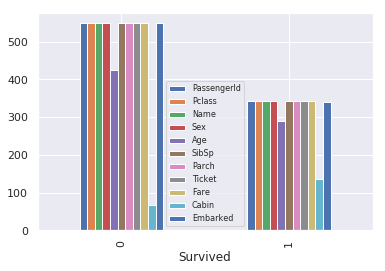

In [0]:
sns.set()
train.groupby('Survived').count().plot(kind='bar')
plt.legend(prop={'size':8})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54cbedc5c0>,
      dtype=object)

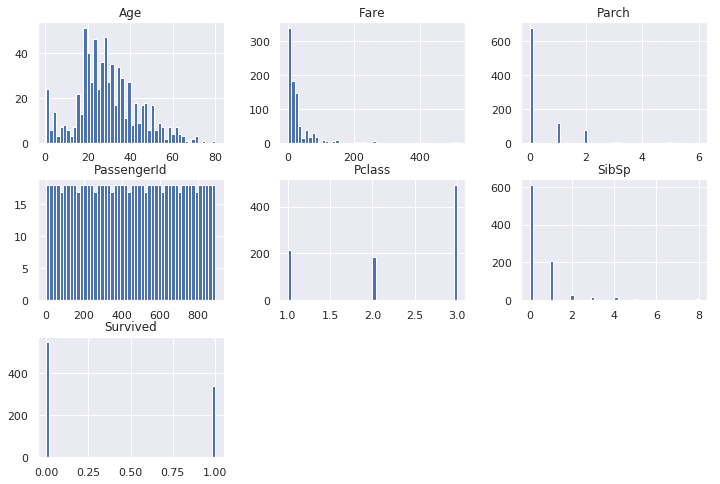

In [0]:
train.hist(bins=50, figsize=(12,8))

# chang data types as human understandable

In [0]:
train.Survived = train.Survived.astype('category')
train.Pclass = train.Pclass.astype('category')
train.Sex = train.Sex.astype('category')
train.Embarked = train.Embarked.astype('category')

In [0]:
train.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

brief EDA for numeric features

In [0]:
train.describe().drop('PassengerId', axis=1)

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


# Visualization Data

##1) Survive count by Pclass

In [0]:
train.groupby('Pclass').Survived.count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

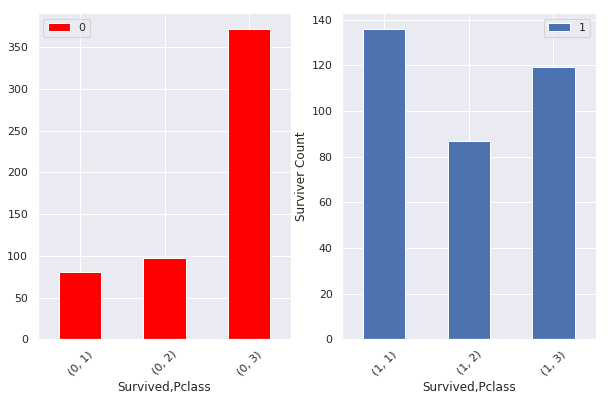

In [0]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
train.groupby(['Survived', 'Pclass']).Pclass.count()[0:3].plot(kind='bar', label = '0', color = 'red')
plt.xticks(rotation=45)
plt.legend()
plt.subplot(1,2,2)
train.groupby(['Survived', 'Pclass']).Pclass.count()[3:].plot(kind='bar', label = '1')
plt.xticks(rotation=45)
plt.ylabel('Surviver Count')
plt.legend()

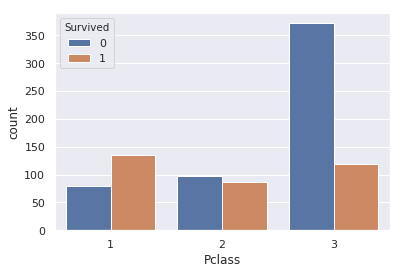

In [0]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = train)

## 2) Survive count by Sex

In [0]:
train.groupby('Sex').Survived.count()

Sex
female    314
male      577
Name: Survived, dtype: int64

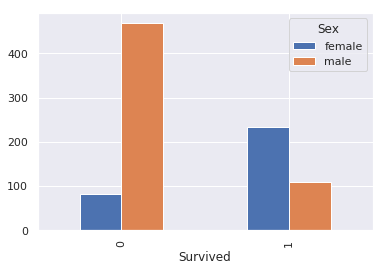

In [0]:
train.groupby(['Survived', 'Sex']).Sex.count().unstack().plot(kind='bar')

Can be easily fall in simpson's paradox

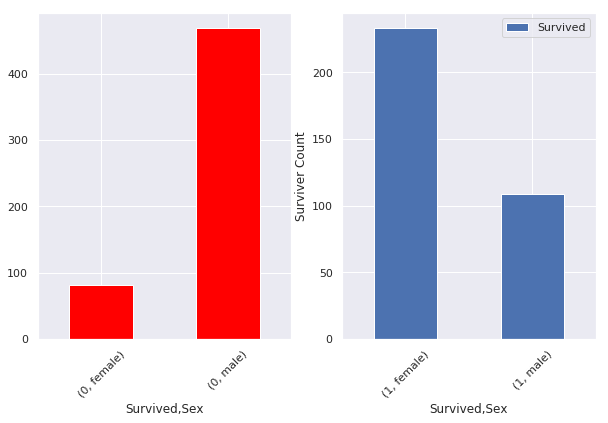

In [0]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
train.groupby(['Survived', 'Sex']).Sex.count()[0:2].plot(kind='bar', label = '0', color = 'red')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
train.groupby(['Survived', 'Sex']).Sex.count()[2:].plot(kind='bar', label = 'Survived')
plt.xticks(rotation=45)
plt.ylabel('Surviver Count')
plt.legend()

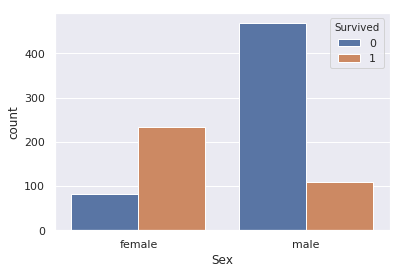

In [0]:
sns.countplot(x='Sex', hue = 'Survived', data = train)

## 3) Survive count by SibSp

In [0]:
train.groupby('SibSp').Survived.count()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64

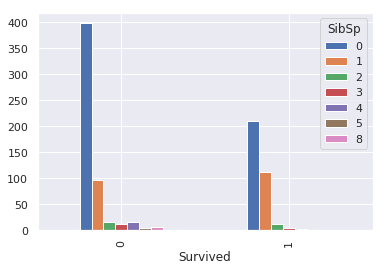

In [0]:
train.groupby(['Survived', 'SibSp']).SibSp.count().unstack().plot(kind='bar')

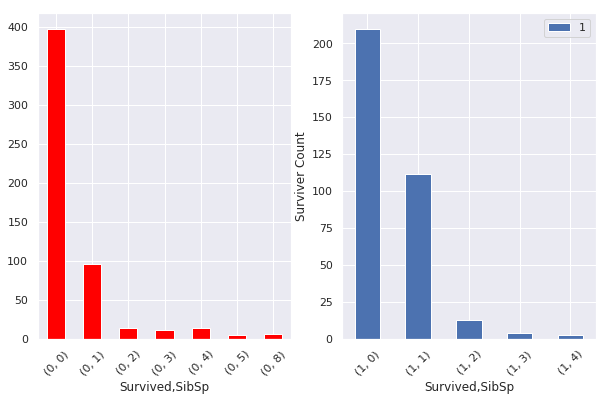

In [0]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
train.groupby(['Survived', 'SibSp']).SibSp.count()[0:7].plot(kind='bar', label = '0', color = 'red')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
train.groupby(['Survived', 'SibSp']).SibSp.count()[7:].plot(kind='bar', label = '1')
plt.xticks(rotation=45)
plt.ylabel('Surviver Count')
plt.legend()

 Hard to compare, aggregate to one

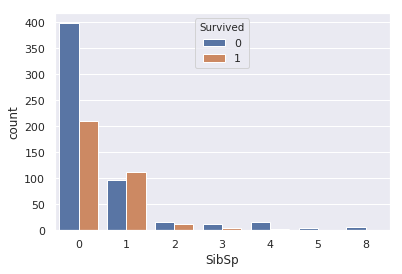

In [0]:
sns.countplot(x='SibSp', hue = 'Survived', data = train)

## 4) Survive count by Embarked

In [0]:
train.groupby('Embarked').Survived.count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

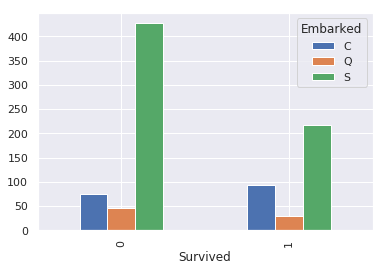

In [0]:
train.groupby(['Survived', 'Embarked']).Pclass.count().unstack().plot(kind='bar')

Text(0, 0.5, 'Surviver Count')

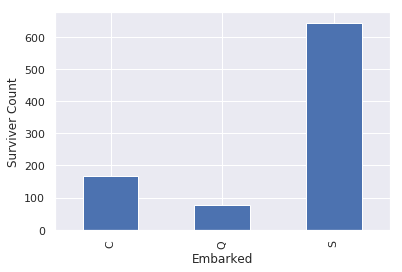

In [0]:
train.groupby('Embarked').Survived.count().plot(kind='bar')
plt.ylabel('Surviver Count')

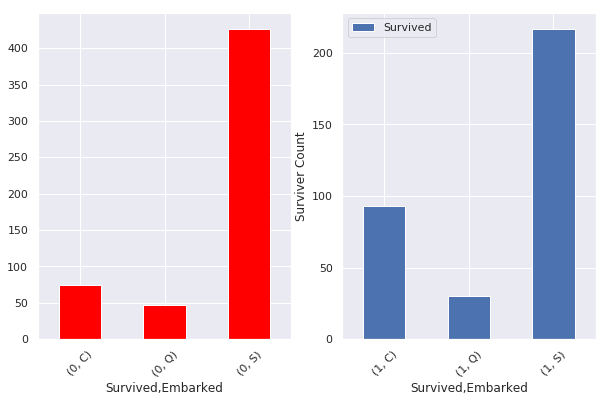

In [0]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
train.groupby(['Survived', 'Embarked']).Embarked.count()[0:3].plot(kind='bar', label = '0', color = 'red')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
train.groupby(['Survived', 'Embarked']).Embarked.count()[3:].plot(kind='bar', label = 'Survived')
plt.xticks(rotation=45)
plt.ylabel('Surviver Count')
plt.legend()

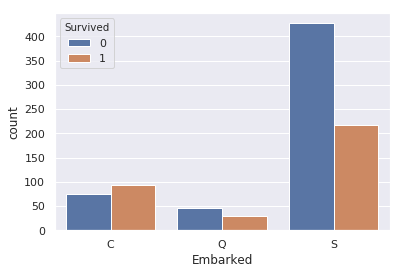

In [0]:
sns.countplot(x = 'Embarked', hue='Survived', data = train)

## 5) Survive count by Parch

In [0]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

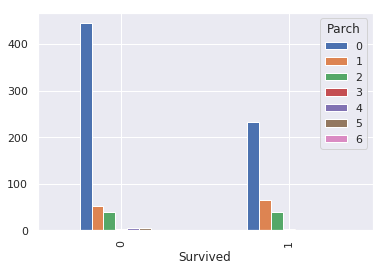

In [0]:
train.groupby(['Survived', 'Parch']).Parch.count().unstack().plot(kind='bar')

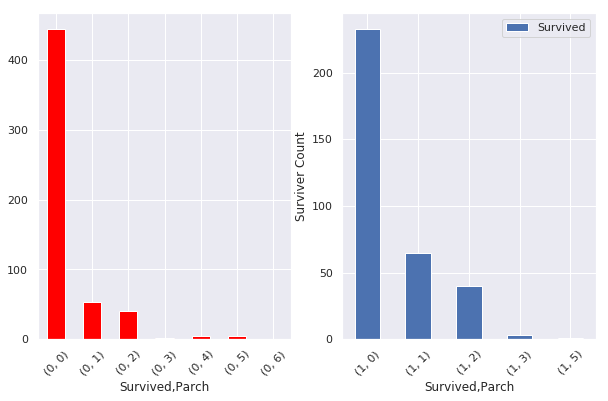

In [0]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
train.groupby(['Survived', 'Parch']).Parch.count()[0:7].plot(kind='bar', label = '0', color = 'red')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
train.groupby(['Survived', 'Parch']).Parch.count()[7:].plot(kind='bar', label = 'Survived')
plt.xticks(rotation=45)
plt.ylabel('Surviver Count')
plt.legend()

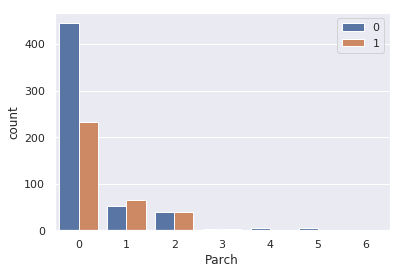

In [0]:
sns.countplot(x = 'Parch', hue = 'Survived', data = train)
plt.legend(loc='upper right')

## 6) Survive count by age

### check the age varibables, 
### requires to change 0 < age < 1 

In [0]:
train.Age.value_counts().sort_index()[:15]

0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
Name: Age, dtype: int64

### age distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text xticklabel objects>)

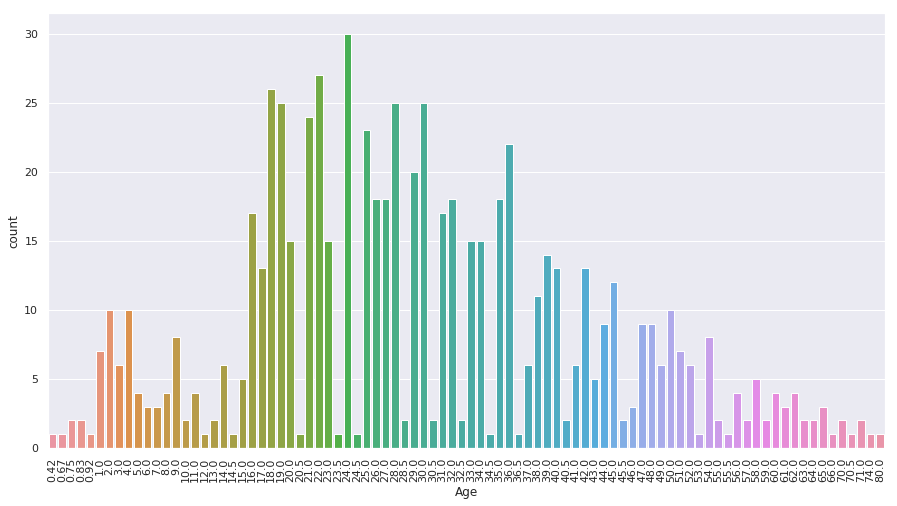

In [0]:
plt.figure(figsize=(15,8))
sns.countplot(x='Age', data = train)
plt.xticks(rotation=90)

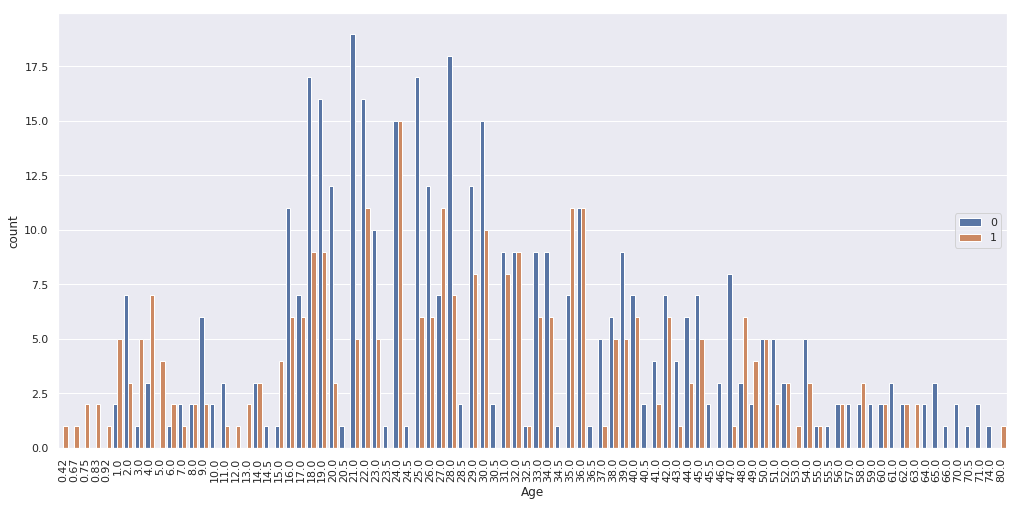

In [0]:
plt.figure(figsize=(17,8))
sns.countplot(x='Age', hue = 'Survived', data = train)
plt.xticks(rotation=90)
plt.legend(loc='right')

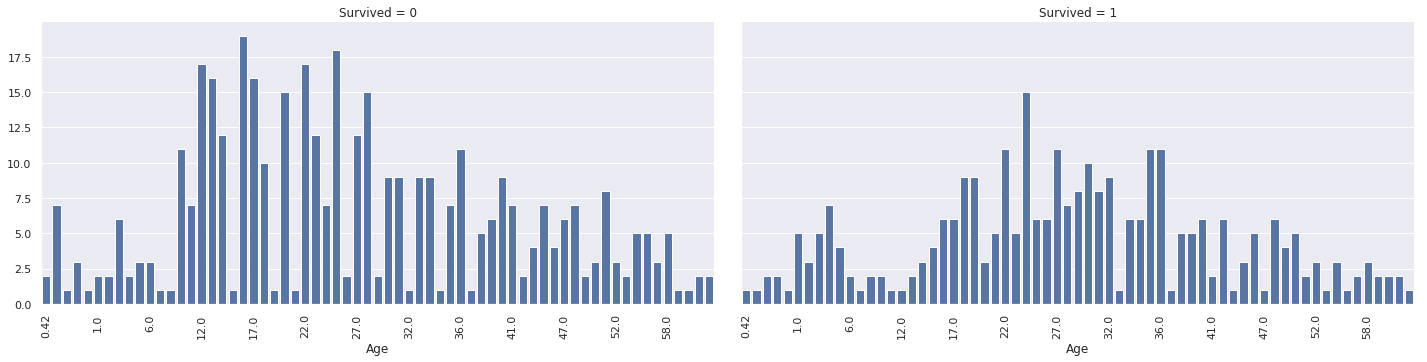

In [0]:
g = sns.FacetGrid(train, col='Survived', size=5, aspect=2)
g.map(sns.countplot, 'Age')
g.set_xticklabels(rotation=90, step=5)

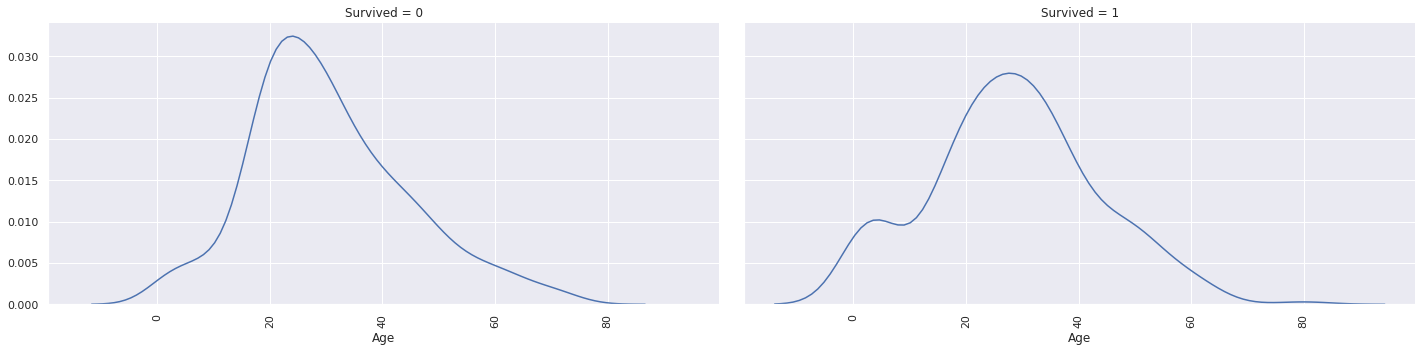

In [0]:
g = sns.FacetGrid(train, col='Survived', size=5, aspect=2)
g.map(sns.kdeplot, 'Age')
g.set_xticklabels(rotation=90)

In [0]:
train.groupby(['Survived']).Age.mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [0]:
train.groupby(['Survived', 'Sex']).Age.mean()

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64

Text(0.5, 1.0, 'Survived Mean Age per gender')

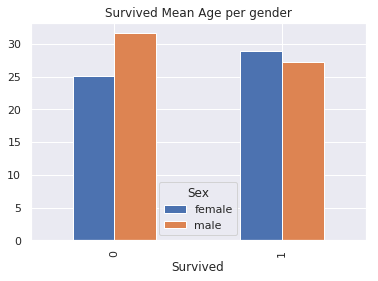

In [0]:
train.groupby(['Survived', 'Sex']).Age.mean().unstack().plot(kind='bar')
plt.title('Survived Mean Age per gender')

In [0]:
print('Age Min')
print(train.groupby(['Survived']).Age.min())
print('\nAge Max')
print(train.groupby(['Survived']).Age.max())
print('\nAge Mean')
print(train.groupby(['Survived']).Age.mean())

Age Min
Survived
0    1.00
1    0.42
Name: Age, dtype: float64

Age Max
Survived
0    74.0
1    80.0
Name: Age, dtype: float64

Age Mean
Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


In [0]:
pd.DataFrame({'min':train.groupby(['Survived']).Age.min(), 
              'max':train.groupby(['Survived']).Age.max(), 
              'mean':train.groupby(['Survived']).Age.mean()})

,min,max,mean
Survived,,,
0,1.00,74.0,30.626179
1,0.42,80.0,28.343690


Survived ~ Age + Sex

In [0]:
SURVIVE_SEX_AGE_df = pd.DataFrame(train.groupby(['Sex', 'Survived']).Age.value_counts())

For checking the pivoting correclty works

In [0]:
SURVIVE_SEX_AGE_df.head()

Age
Sex    Survived Age      
female 0        18.0    5
                2.0     4
                9.0     4
                21.0    3
                25.0    3

In [0]:
SURVIVE_SEX_AGE_df_unstack = pd.DataFrame(train.groupby(['Sex', 'Survived']).Age.value_counts()).unstack()

Female

In [0]:
SURVIVE_SEX_AGE_df_unstack.loc['female', :]

Age                          ...                              
Age      0.42  0.67  0.75  0.83  0.92   ... 70.00 70.50 71.00 74.00 80.00
Survived                                ...                              
0          NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
1          NaN   NaN   2.0   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN

[2 rows x 88 columns]

Male

In [0]:
SURVIVE_SEX_AGE_df_unstack.loc['male', :]

Age                          ...                              
Age      0.42  0.67  0.75  0.83  0.92   ... 70.00 70.50 71.00 74.00 80.00
Survived                                ...                              
0          NaN   NaN   NaN   NaN   NaN  ...   2.0   1.0   2.0   1.0   NaN
1          1.0   1.0   NaN   2.0   1.0  ...   NaN   NaN   NaN   NaN   1.0

[2 rows x 88 columns]

In [0]:
female_0 = SURVIVE_SEX_AGE_df_unstack.loc[('female', 0)].reset_index().drop('level_0', axis = 1).dropna()
female_0.columns = ['Age', '0']

female_1 = SURVIVE_SEX_AGE_df_unstack.loc[('female', 1)].reset_index().drop('level_0', axis = 1).dropna()
female_1.columns = ['Age', '1']


male_0 = SURVIVE_SEX_AGE_df_unstack.loc[('male', 0)].reset_index().drop('level_0', axis = 1).dropna()
male_0.columns = ['Age', '0']

male_1 = SURVIVE_SEX_AGE_df_unstack.loc[('male', 1)].reset_index().drop('level_0', axis = 1).dropna()
male_1.columns = ['Age', '1']


Text(0.5, 1.0, 'Male [ 1 ]')

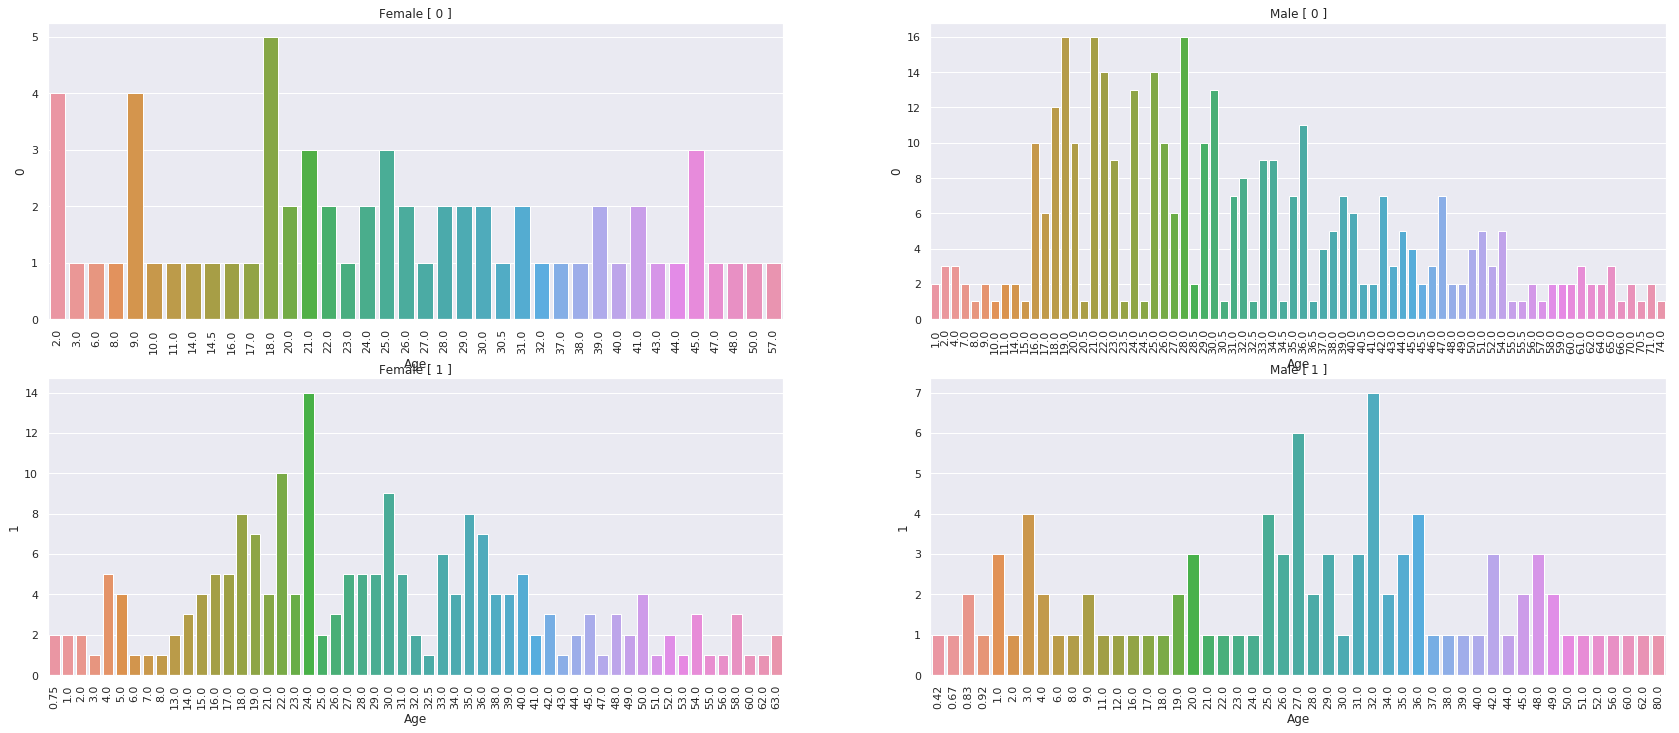

In [0]:
plt.figure(figsize=(29,12))

plt.subplot(2,2,1)
sns.barplot(x='Age', y = '0', data = female_0)
plt.xticks(rotation=90)
plt.title("Female [ 0 ]")

plt.subplot(2,2,3)
sns.barplot(x='Age', y = '1', data = female_1)
plt.xticks(rotation=90)
plt.title("Female [ 1 ]")

plt.subplot(2,2,2)
sns.barplot(x='Age', y = '0', data = male_0)
plt.xticks(rotation=90)
plt.title("Male [ 0 ]")

plt.subplot(2,2,4)
sns.barplot(x='Age', y = '1', data = male_1)
plt.xticks(rotation=90)
plt.title("Male [ 1 ]")


In [0]:
female_0 = SURVIVE_SEX_AGE_df_unstack.loc[('female', 0)].reset_index().drop('level_0', axis = 1).dropna()
female_0.columns = ['Age', '0']
female_0.set_index('Age', inplace=True)

female_1 = SURVIVE_SEX_AGE_df_unstack.loc[('female', 1)].reset_index().drop('level_0', axis = 1).dropna()
female_1.columns = ['Age', '1']
female_1.set_index('Age', inplace=True)

male_0 = SURVIVE_SEX_AGE_df_unstack.loc[('male', 0)].reset_index().drop('level_0', axis = 1).dropna()
male_0.columns = ['Age', '0']
male_0.set_index('Age', inplace= True)

male_1 = SURVIVE_SEX_AGE_df_unstack.loc[('male', 1)].reset_index().drop('level_0', axis = 1).dropna()
male_1.columns = ['Age', '1']
male_1.set_index('Age', inplace=True)

In [0]:
female = pd.concat([female_0, female_1], axis = 1)
female.columns = ['female_0', 'female_1']


In [0]:
male = pd.concat([male_0, male_1], axis = 1)
male.columns = ['male_0', 'male_1']

In [0]:
full_sex = pd.concat([female, male], axis=1)
full_sex.reset_index(inplace=True)
full_sex.head()

,Age,female_0,female_1,male_0,male_1
0,0.42,NaN,NaN,NaN,1.0
1,0.67,NaN,NaN,NaN,1.0
2,0.75,NaN,2.0,NaN,NaN
3,0.83,NaN,NaN,NaN,2.0
4,0.92,NaN,NaN,NaN,1.0


In [0]:
full_sex_melt = pd.melt(full_sex,id_vars='Age')
full_sex_melt = full_sex_melt.sort_values('Age')

In [0]:
print(full_sex_melt.shape)
full_sex_melt.head()

(352, 3)


,Age,variable,value
0,0.42,female_0,NaN
264,0.42,male_1,1.0
176,0.42,male_0,NaN
88,0.42,female_1,NaN
1,0.67,female_0,NaN


In [0]:
sex_survived = full_sex_melt[(full_sex_melt.variable =='male_1') | (full_sex_melt.variable == 'female_1')]
sex_not_survived = full_sex_melt[(full_sex_melt.variable =='male_0') | (full_sex_melt.variable == 'female_0')]

Text(0.5, 1.0, 'Survived')

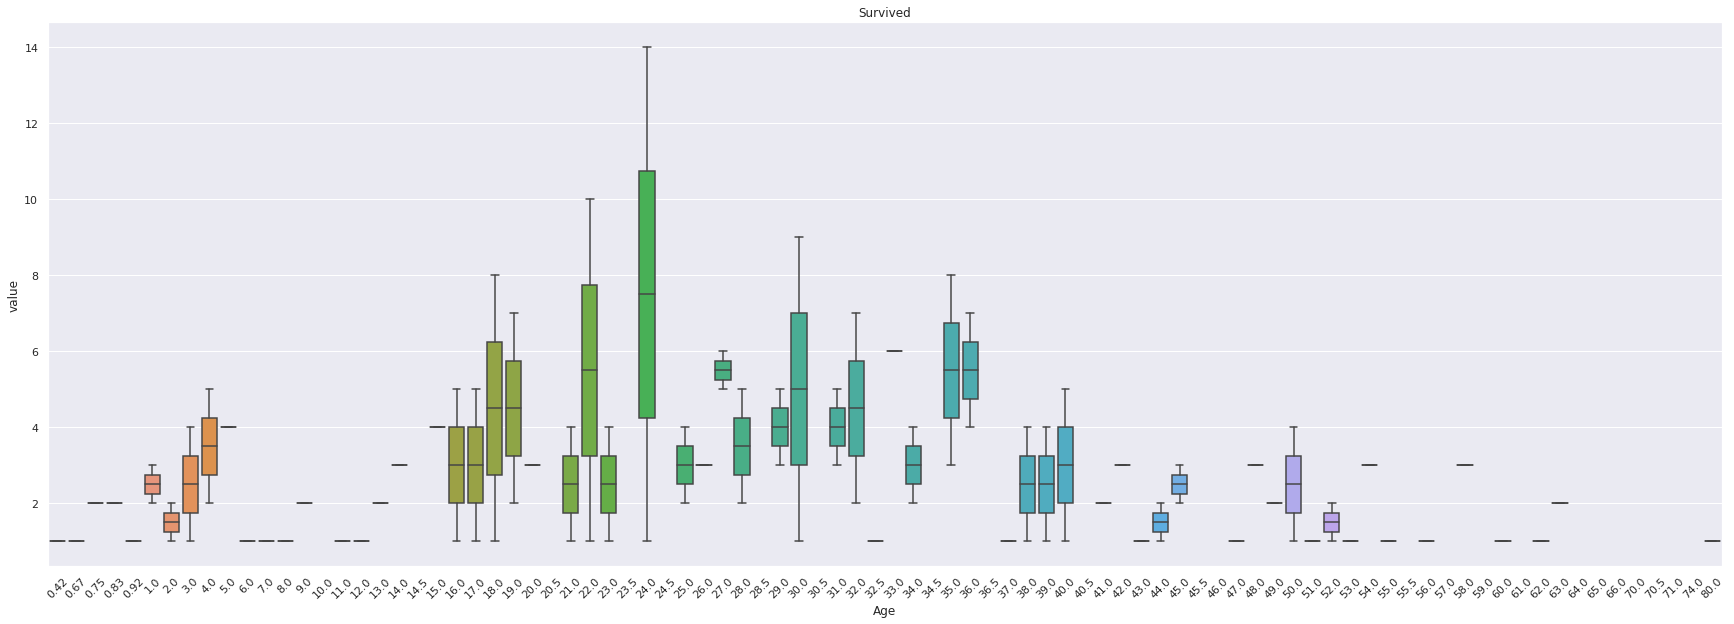

In [0]:
plt.figure(figsize=(30,10))
sns.boxplot(x = 'Age', y = 'value', data=sex_survived)
plt.xticks(rotation=45)
plt.title('Survived')

Text(0.5, 1.0, 'Not Survived')

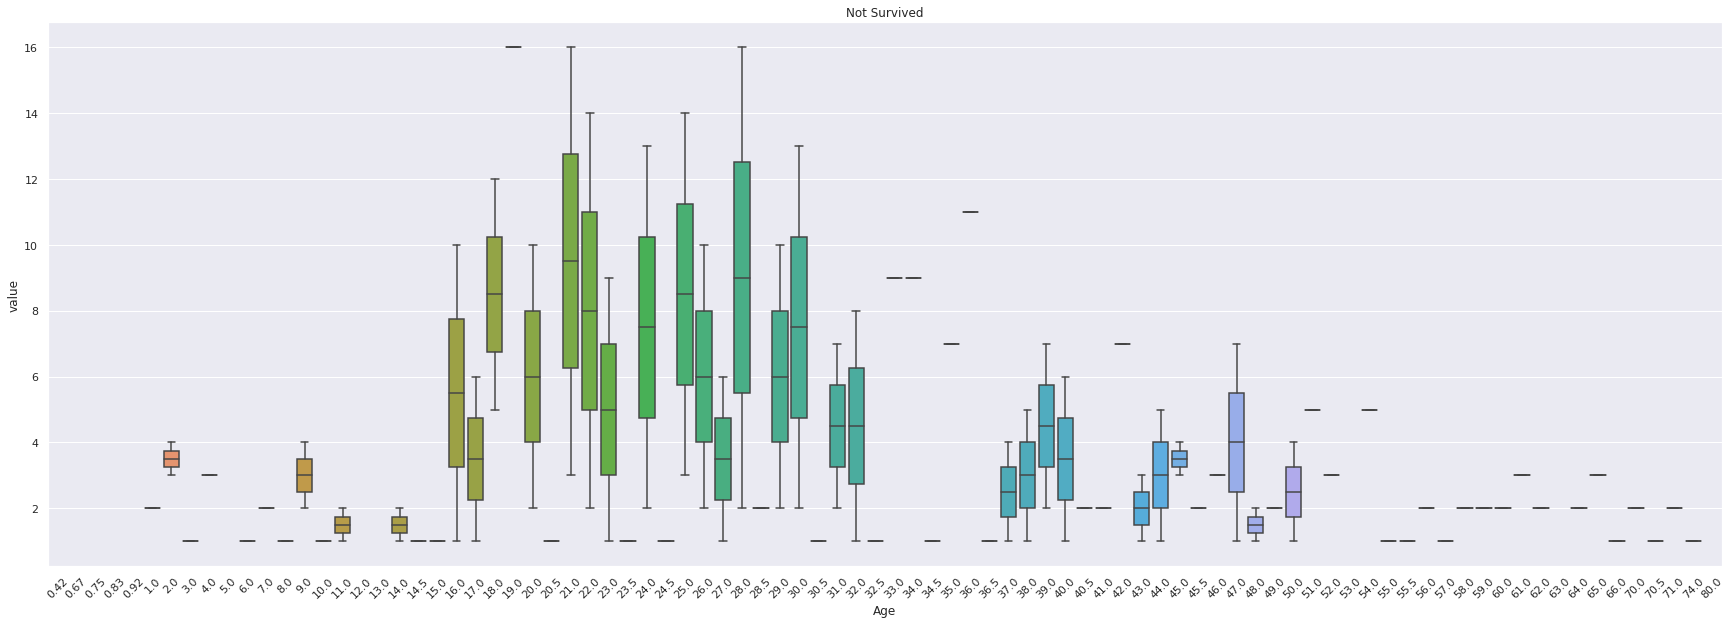

In [0]:
plt.figure(figsize=(30,10))
sns.boxplot(x = 'Age', y = 'value', data=sex_not_survived)
plt.xticks(rotation=45)
plt.title('Not Survived')

using ggplot, check density of age distribution by age

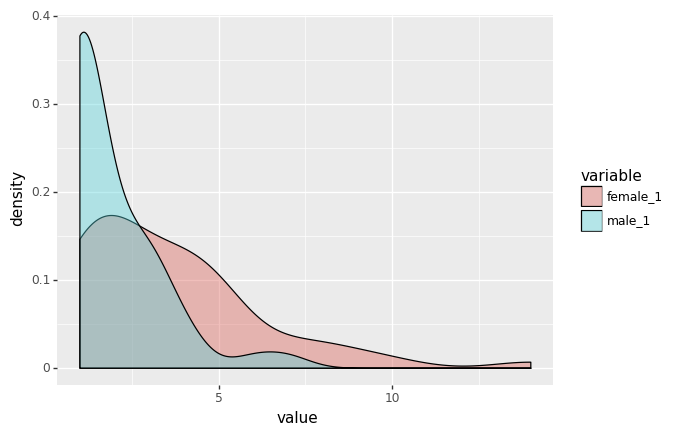

<ggplot: (8745095868648)>

In [0]:
ggplot(sex_survived, aes(x = 'value', fill = 'variable')) + geom_density(alpha = 0.4)

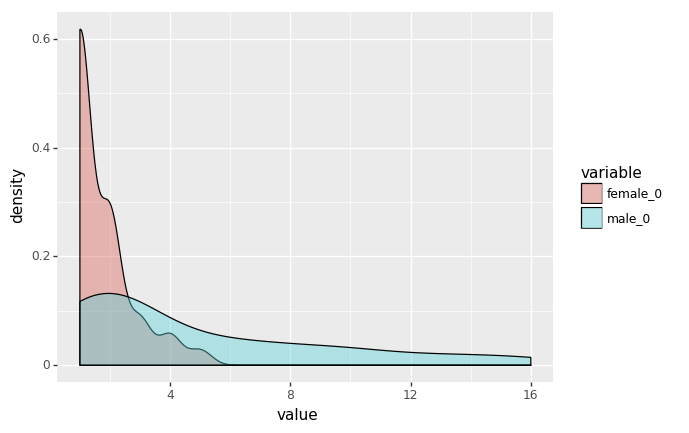

<ggplot: (-9223363291758961639)>

In [0]:
ggplot(sex_not_survived, aes(x = 'value', fill = 'variable')) + geom_density(alpha = 0.4)

### survive count by fare

In [0]:
train.Fare.value_counts().sort_index()

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

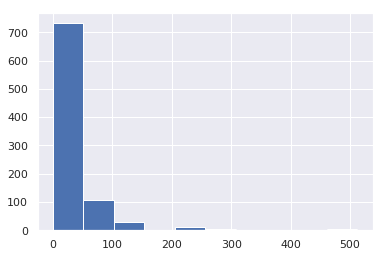

In [0]:
plt.hist(x = train.Fare)

In [0]:
survived_fare_serise = train.groupby(['Survived', 'Fare']).Fare.count().sort_index()

Text(0.5, 1.0, 'Non Survived by Fare')

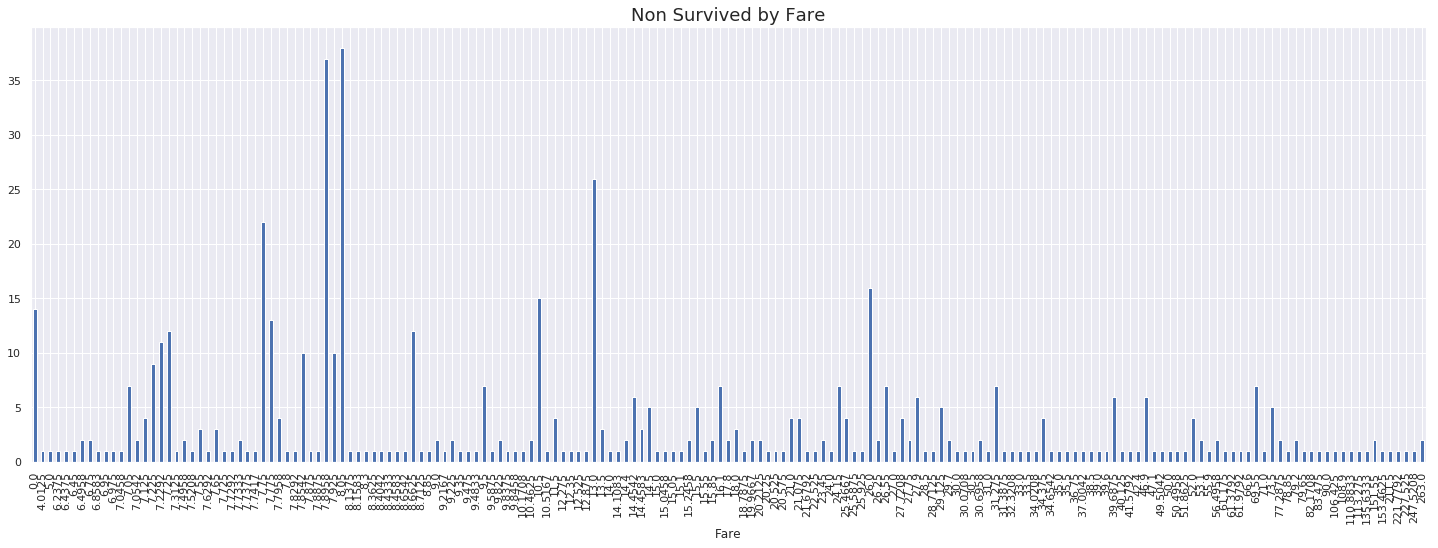

In [0]:
plt.figure(figsize=(25,8))
survived_fare_serise.loc[0].plot('bar')
plt.title('Non Survived by Fare', fontdict={'fontsize' : 18})


Text(0.5, 1.0, 'Survived by Fare')

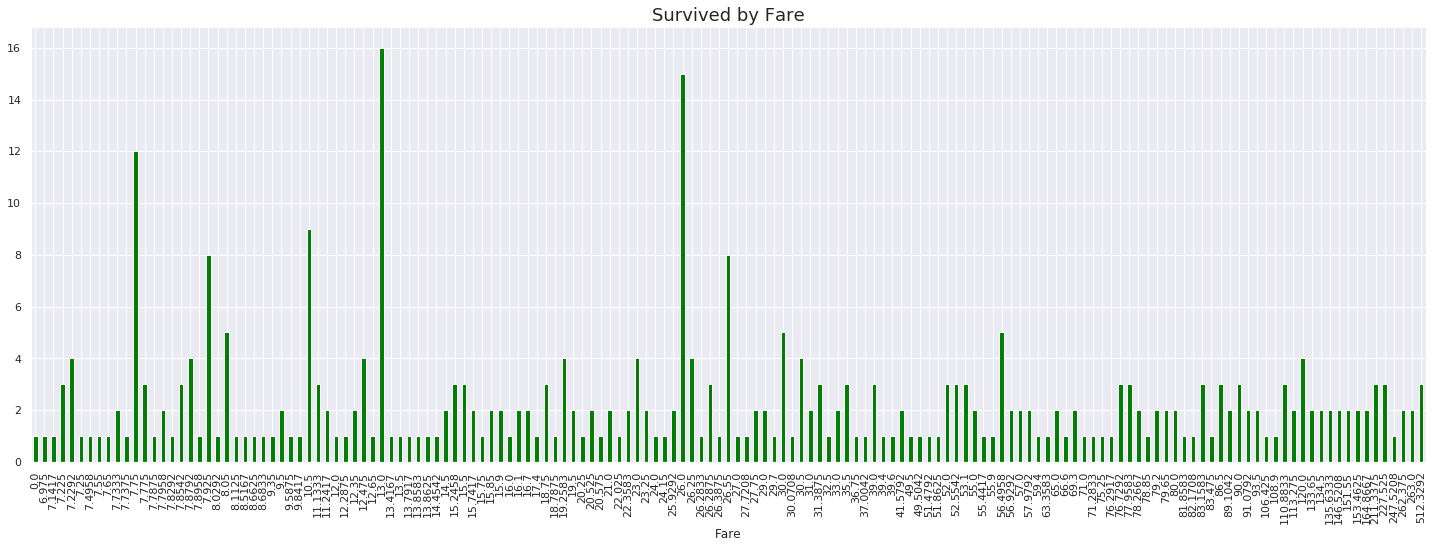

In [0]:
plt.figure(figsize=(25,8))
survived_fare_serise.loc[1].plot('bar', color ='green')
plt.title('Survived by Fare', fontdict={'fontsize' : 18})

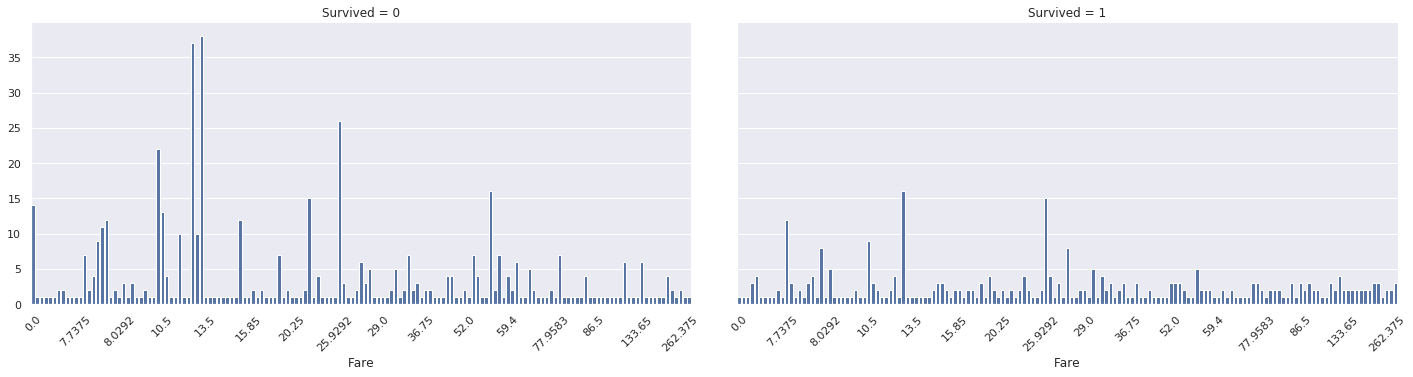

In [0]:
fare = sns.FacetGrid(train, col='Survived', size=5, aspect=2)
fare.map(sns.countplot, 'Fare')
fare.set_xticklabels(rotation=45, step=10)

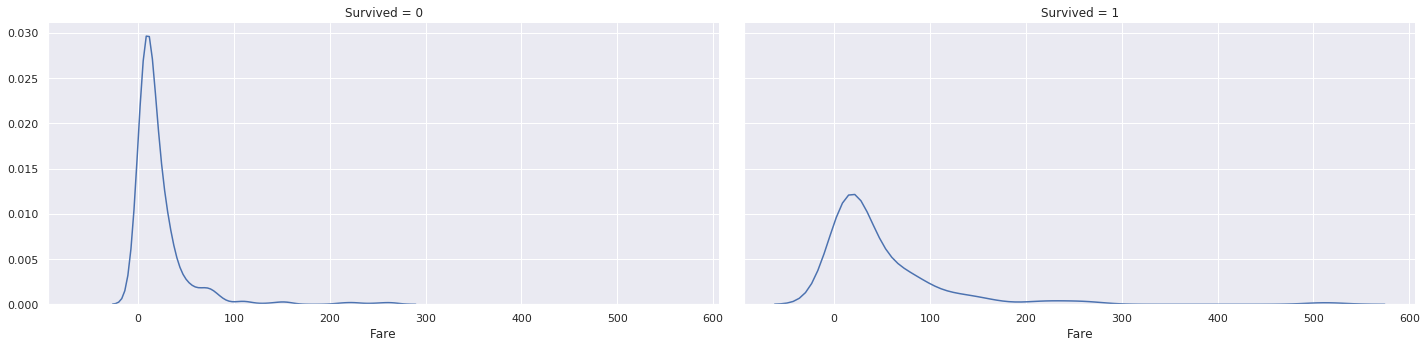

In [0]:
fare = sns.FacetGrid(train, col='Survived', size=5, aspect=2)
fare.map(sns.kdeplot, 'Fare')

In [0]:
survived_table = train.groupby('Survived').count()
display(survived_table)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


# Handling Missing Data

In [0]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 1) Handling Embarked NA

In [0]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Considering which value to be filled

In [0]:
train[train.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [0]:
train[train.Cabin=="B28"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [0]:
train[train.Ticket=="113572"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [0]:
cabin_df = train[train.Cabin.notnull()]
display(cabin_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [0]:
cabin_df['Cabin'].head(15)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
54            B30
55            C52
61            B28
62            C83
66            F33
Name: Cabin, dtype: object

In [0]:
import re

In [0]:
cabin_df['cabin_alphabet'] = cabin_df['Cabin'].apply(lambda x: re.sub(pattern, '', x).strip())

In [0]:
cabin_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_alphabet
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,C


In [0]:
cabin_df['cabin_alphabet_strip'] = cabin_df['cabin_alphabet'].apply(lambda x : x[0])

In [0]:
pd.crosstab(cabin_df.Embarked, cabin_df.cabin_alphabet_strip)

cabin_alphabet_strip,A,B,C,D,E,F,G,T
Embarked,,,,,,,,
C,7,22,21,13,5,1,0,0
Q,0,0,2,0,1,1,0,0
S,8,23,36,20,26,11,4,1


In [0]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## Embarked fill na decision
###  For the Embarked, there are similart proportion of B, 
### one for C , one for S

In [0]:
train.loc[61, 'Embarked'] = 'C'
train.loc[829, 'Embarked'] = 'S'

In [0]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### checking imputing

In [0]:
train.loc[[61,829], :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [0]:
train.Embarked.value_counts()

S    645
C    169
Q     77
Name: Embarked, dtype: int64

In [0]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# 2) Handling Cabin NA

the NaN mean  " not cabin, just customer"

In [0]:
train.Cabin.value_counts()[:5]

G6             4
B96 B98        4
C23 C25 C27    4
D              3
F2             3
Name: Cabin, dtype: int64

In [0]:
train[train.Cabin.isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


## Check test data for Embark


In [0]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Cabin fill na decision
###  the NaN means just cutomer, so i will just put another categorical value to set customer 

In [0]:
train.Cabin.fillna('customer', inplace = True)
test.Cabin.fillna('customer', inplace = True)

In [0]:
train.Cabin.head()

0    customer
1         C85
2    customer
3        C123
4    customer
Name: Cabin, dtype: object

In [0]:
train.Cabin.value_counts()[:5]

customer       687
G6               4
C23 C25 C27      4
B96 B98          4
D                3
Name: Cabin, dtype: int64

In [0]:
train.Cabin = train.Cabin.astype('category')
test.Cabin = test.Cabin.astype('category')

In [0]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

Checking Test Set

In [0]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

# 3) Handling Age NA


In [0]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [0]:
train[train.Age.isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,customer,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,customer,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,customer,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,customer,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,customer,Q


### fill Age decision 
###1) group by (Pclass & Sex, Cabin or not, fill its mean)

In [0]:
Age_imputer_df = train.copy()

In [0]:
Age_imputer_df['cabin_or_not'] = Age_imputer_df.Cabin.apply(lambda x : 1 if x == 'customer' else 0)

In [0]:
Age_imputer_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_or_not
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,customer,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,customer,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,customer,S,1


In [0]:
Age_imputer_df.groupby(['Pclass', 'Sex', 'cabin_or_not']).Age.mean()

Pclass  Sex     cabin_or_not
1       female  0               34.513158
                1               35.444444
        male    0               40.671667
                1               44.294118
2       female  0               29.611111
                1               28.600000
        male    0               18.750000
                1               31.514301
3       female  0               17.200000
                1               21.984536
        male    0               24.800000
                1               26.542016
Name: Age, dtype: float64

In [0]:
Age_imputer_df.groupby(['Pclass', 'Sex', 'cabin_or_not']).Age.transform('mean')

0      26.542016
1      34.513158
2      21.984536
3      34.513158
4      26.542016
5      26.542016
6      40.671667
7      26.542016
8      21.984536
9      28.600000
10     17.200000
11     34.513158
12     26.542016
13     26.542016
14     21.984536
15     28.600000
16     26.542016
17     31.514301
18     21.984536
19     21.984536
20     31.514301
21     18.750000
22     21.984536
23     40.671667
24     21.984536
25     21.984536
26     26.542016
27     40.671667
28     21.984536
29     26.542016
         ...    
861    31.514301
862    34.513158
863    21.984536
864    31.514301
865    28.600000
866    28.600000
867    40.671667
868    26.542016
869    26.542016
870    26.542016
871    34.513158
872    40.671667
873    26.542016
874    28.600000
875    21.984536
876    26.542016
877    26.542016
878    26.542016
879    34.513158
880    28.600000
881    26.542016
882    21.984536
883    31.514301
884    26.542016
885    21.984536
886    31.514301
887    34.513158
888    21.9845

In [0]:
Age_imputer_df.Age.fillna(train.groupby(['Pclass', 'Sex', 'Cabin']).Age.transform('mean'), inplace=True)

In [0]:
Age_imputer_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_or_not
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,customer,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,customer,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,customer,S,1


In [0]:
Age_imputer_df.Age.isna().sum()

15

## there are still remain na ages, re-check its value

In [0]:
Age_imputer_df[Age_imputer_df.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_or_not
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,0
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S,0
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S,0
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S,0
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,0
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S,0
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,0
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S,0


## to fulfill its filling, group by just (Pclass, Sex)

In [0]:
Age_imputer_df = train.copy()

In [0]:
Age_imputer_df['cabin_or_not'] = train.Cabin.apply(lambda x : 1 if x == 'customer' else 0)

In [0]:
Age_imputer_df.groupby(['Pclass', 'Sex']).Age.transform('mean')

0      26.507589
1      34.611765
2      21.750000
3      34.611765
4      26.507589
5      26.507589
6      41.281386
7      26.507589
8      21.750000
9      28.722973
10     21.750000
11     34.611765
12     26.507589
13     26.507589
14     21.750000
15     28.722973
16     26.507589
17     30.740707
18     21.750000
19     21.750000
20     30.740707
21     30.740707
22     21.750000
23     41.281386
24     21.750000
25     21.750000
26     26.507589
27     41.281386
28     21.750000
29     26.507589
         ...    
861    30.740707
862    34.611765
863    21.750000
864    30.740707
865    28.722973
866    28.722973
867    41.281386
868    26.507589
869    26.507589
870    26.507589
871    34.611765
872    41.281386
873    26.507589
874    28.722973
875    21.750000
876    26.507589
877    26.507589
878    26.507589
879    34.611765
880    28.722973
881    26.507589
882    21.750000
883    30.740707
884    26.507589
885    21.750000
886    30.740707
887    34.611765
888    21.7500

In [0]:
Age_imputer_df.Age.fillna(Age_imputer_df.groupby(['Pclass', 'Sex']).Age.transform('mean'), inplace=True)

In [0]:
Age_imputer_df.Age.isna().sum()

0

# apply to train set

In [0]:
train.Age.fillna(Age_imputer_df.groupby(['Pclass', 'Sex']).Age.transform('mean'), inplace = True)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null category
Embarked       891 non-null category
dtypes: category(5), float64(2), int64(3), object(2)
memory usage: 60.6+ KB


## fill the test set with the same way

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          418 non-null category
Embarked       418 non-null object
dtypes: category(1), float64(2), int64(4), object(4)
memory usage: 36.2+ KB


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,customer,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,customer,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,customer,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,customer,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,customer,S


In [0]:
test_imputer = test.copy()

In [0]:
test_imputer['cabin_or_not'] = test_imputer.Cabin.apply(lambda x : 1 if x == 'customer' else 0)

In [0]:
test_imputer.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_or_not
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,customer,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,customer,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,customer,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,customer,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,customer,S,1


In [0]:
test_imputer.groupby(['Pclass', 'Sex']).Age.transform('mean')

0      24.525104
1      23.073400
2      30.940678
3      24.525104
4      23.073400
5      24.525104
6      23.073400
7      30.940678
8      23.073400
9      24.525104
10     24.525104
11     40.520000
12     41.333333
13     30.940678
14     41.333333
15     24.376552
16     30.940678
17     24.525104
18     23.073400
19     23.073400
20     40.520000
21     24.525104
22     41.333333
23     40.520000
24     41.333333
25     24.525104
26     41.333333
27     24.525104
28     40.520000
29     24.525104
         ...    
388    24.525104
389    24.525104
390    40.520000
391    41.333333
392    24.525104
393    30.940678
394    24.525104
395    41.333333
396    24.525104
397    41.333333
398    24.525104
399    24.525104
400    41.333333
401    30.940678
402    41.333333
403    40.520000
404    40.520000
405    30.940678
406    30.940678
407    40.520000
408    23.073400
409    23.073400
410    23.073400
411    41.333333
412    23.073400
413    24.525104
414    41.333333
415    24.5251

In [0]:
test_imputer.Age.fillna(test_imputer.groupby(['Pclass', 'Sex']).Age.transform('mean'), inplace = True)

In [0]:
test_imputer.Age.isna().sum()

0

## apply to test data set

In [0]:
test.Age.fillna(test_imputer.groupby(['Pclass', 'Sex']).Age.transform('mean'), inplace = True)

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          418 non-null category
Embarked       418 non-null object
dtypes: category(1), float64(2), int64(4), object(4)
memory usage: 36.2+ KB


# On the test set, there is one NA value in Fare

### fill the fare in test set

In [0]:
test[test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,customer,S


## imputing decision, imputing Pclass mean value

In [0]:
test.groupby('Pclass').Fare.mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [0]:
test.Fare.fillna(test.groupby('Pclass').Fare.mean()[3], inplace = True)

check imputing

In [0]:
test.iloc[152, :]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                      12.4597
Cabin                    customer
Embarked                        S
Name: 152, dtype: object

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null category
Embarked       418 non-null object
dtypes: category(1), float64(2), int64(4), object(4)
memory usage: 36.2+ KB


Save the fill_na work sheets

In [0]:
train.to_csv('/content/drive/input/Titanic/Working_dir/train_fillna.csv', index=False)
test.to_csv('/content/drive/input/Titanic/Working_dir/test_fillna.csv', index=False)

FileNotFoundError: ignored

## Make identical type between train & test

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null category
Embarked       891 non-null category
dtypes: category(5), float64(2), int64(3), object(2)
memory usage: 60.6+ KB


In [0]:
test.Pclass = test.Pclass.astype('category')
test.Sex = test.Sex.astype('category')
test.Embarked = test.Embarked.astype('category')

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null category
Name           418 non-null object
Sex            418 non-null category
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null category
Embarked       418 non-null category
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 28.0+ KB


## required preprocessing 
# 1**) binning age**



### 2) binning fare
### 3) Name 
### 4) Ticket

In [0]:
train.Age.value_counts().sort_index()[:15]

0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
Name: Age, dtype: int64

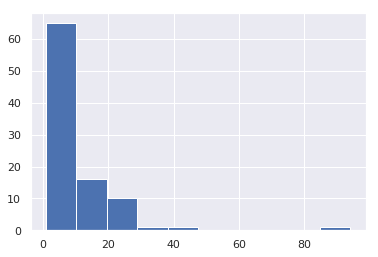

In [0]:
train.Age.value_counts().sort_index().hist()

## Age_binning

 x < 5: 
    return 0 : baby
  
 x < 10:
    return 1 : kid
  
  x < 20: 
    return 2 : teen
    
 x < 30:  
    return 3 : twenteen
    
 x < 40:
    return 4 : thireen
  
 else:
    return 5 : other

In [0]:
def age_binning(x):
  
  if x < 5:
    return 0
  
  elif x < 10:
    return 1
  
  elif x < 20:
    return 2
  
  elif x < 30:
    return 3
  
  elif x < 40:
    return 4
  
  else:
    return 5

In [0]:
test_df = train.copy()

In [0]:
test_df['age_bin'] = test_df.Age.apply(age_binning)

In [0]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,customer,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,customer,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,customer,S,4


## apply to train set

In [0]:
train['age_bin'] = train.Age.apply(age_binning)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,customer,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,customer,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,customer,S,4


In [0]:
train.age_bin.value_counts().sort_index()

0     40
1     22
2    102
3    358
4    185
5    184
Name: age_bin, dtype: int64

## and set the new column as category

In [0]:
train.age_bin = train.age_bin.astype('category')

## apply to test set

In [0]:
test['age_bin'] = test.Age.apply(age_binning)

In [0]:
test.age_bin = test.age_bin.astype('category')

In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,customer,Q,4
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,customer,S,5
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,customer,Q,5
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,customer,S,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,customer,S,3



## required preprocessing 
###1 ) binning age
# 2) binning fare
### 3) Name 
### 4) Ticket

In [0]:
train.describe().Fare

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [0]:
train.Fare.value_counts().sort_index()

0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
6.4500       1
6.4958       2
6.7500       2
6.8583       1
6.9500       1
6.9750       2
7.0458       1
7.0500       7
7.0542       2
7.1250       4
7.1417       1
7.2250      12
7.2292      15
7.2500      13
7.3125       1
7.4958       3
7.5208       1
7.5500       4
7.6292       1
7.6500       4
7.7250       1
7.7292       1
7.7333       4
7.7375       2
7.7417       1
            ..
80.0000      2
81.8583      1
82.1708      2
83.1583      3
83.4750      2
86.5000      3
89.1042      2
90.0000      4
91.0792      2
93.5000      2
106.4250     2
108.9000     2
110.8833     4
113.2750     3
120.0000     4
133.6500     2
134.5000     2
135.6333     3
146.5208     2
151.5500     4
153.4625     3
164.8667     2
211.3375     3
211.5000     1
221.7792     1
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: Fare, Length: 248, dtype: int64

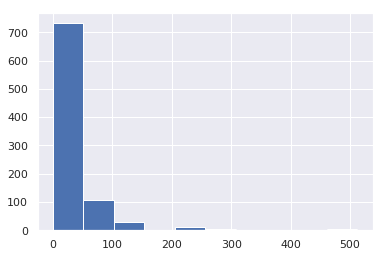

In [0]:
train.Fare.hist()

In [0]:
train.Fare.count()

891

In [0]:
train.Fare[train.Fare > 10].count()

555

In [0]:
555/891*100

62.2895622895623

62% of Fare is  '  < 10 '

###Rather than binning ,will do scaling later


## required preprocessing 
###1 ) binning age
### 2) binning fare - most of data contains $10 less, so will just scale it
# 3) Name 
### 4) Ticket

### for the name 
### ex) Braud is last name

### for the name feature, i will choose 
### 1) split` [last_name, surname ] `


In [0]:
test_name = train.Name[0]
test_name

'Braund, Mr. Owen Harris'

In [0]:
print(test_name.split(',')[0].strip())
print(test_name.split(',')[1].split('.')[0].strip())

Braund
Mr


In [0]:
def extract_lastname(x):
  surname = x.split(',')[0].strip()
  return surname


def extract_sur_name(x):
  last_name = x.split(',')[1].split('.')[0].strip()
  return last_name

In [0]:
test_train = train.copy()

In [0]:
test_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,customer,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,customer,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,customer,S,4


In [0]:
test_train['lastname'] = test_train.Name.apply(extract_lastname)
test_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin,lastname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,customer,S,3,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,customer,S,3,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,customer,S,4,Allen


In [0]:
test_train['surname'] = test_train.Name.apply(extract_sur_name)
test_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin,lastname,surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,customer,S,3,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,customer,S,3,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,customer,S,4,Allen,Mr


looks works fine, lets apply to train set

In [0]:
train['lastname'] = train.Name.apply(extract_lastname)
train['surname'] = train.Name.apply(extract_sur_name)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin,lastname,surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,customer,S,3,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,customer,S,3,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,customer,S,4,Allen,Mr


In [0]:
train.lastname.value_counts()

Andersson                 9
Sage                      7
Skoog                     6
Johnson                   6
Carter                    6
Goodwin                   6
Panula                    6
Rice                      5
Ford                      4
Harper                    4
Hart                      4
Williams                  4
Smith                     4
Kelly                     4
Asplund                   4
Harris                    4
Gustafsson                4
Brown                     4
Fortune                   4
Lefebre                   4
Baclini                   4
Palsson                   4
Taussig                   3
Meyer                     3
Graham                    3
Olsen                     3
Navratil                  3
Boulos                    3
Goldsmith                 3
Elias                     3
                         ..
de Messemaeker            1
Parrish                   1
Slemen                    1
Jerwan                    1
Dennis              

### The including last name my occur over fitting, because there are tons of different last name

In [0]:
train.surname.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Don               1
Jonkheer          1
the Countess      1
Mme               1
Capt              1
Sir               1
Ms                1
Lady              1
Name: surname, dtype: int64

In [0]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin,lastname,surname
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S,5,Taussig,Mr
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.05,customer,S,5,Rouse,Mr
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.0,0,0,345783,9.50,customer,S,3,Vanden Steen,Mr
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,customer,S,2,Abbott,Mr
90,91,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.05,customer,S,3,Christmann,Mr


## apply to test set

In [0]:
test['lastname'] = test.Name.apply(extract_lastname)
test['surname'] = test.Name.apply(extract_sur_name)

In [0]:
test.surname.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: surname, dtype: int64

In [0]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin,lastname,surname
86,978,3,"Barry, Miss. Julia",female,27.000000,0,0,330844,7.8792,customer,Q,3,Barry,Miss
222,1114,2,"Cook, Mrs. (Selena Rogers)",female,22.000000,0,0,W./C. 14266,10.5000,F33,S,3,Cook,Mrs
84,976,2,"Lamb, Mr. John Joseph",male,30.940678,0,0,240261,10.7083,customer,Q,4,Lamb,Mr
192,1084,3,"van Billiard, Master. Walter John",male,11.500000,1,1,A/5. 851,14.5000,customer,S,2,van Billiard,Master
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.000000,1,0,19928,90.0000,C78,Q,4,Minahan,Mrs



## required preprocessing 
###1 ) binning age
###2) binning fare most of data contains $10 less, so will just scale it
###3) Name 
#4) Ticket

In [0]:
train.Ticket.value_counts()

347082                7
1601                  7
CA. 2343              7
3101295               6
347088                6
CA 2144               6
S.O.C. 14879          5
382652                5
PC 17757              4
17421                 4
347077                4
4133                  4
LINE                  4
W./C. 6608            4
113781                4
2666                  4
19950                 4
113760                4
349909                4
SC/Paris 2123         3
C.A. 34651            3
35273                 3
24160                 3
345773                3
248727                3
230080                3
PC 17760              3
110152                3
347742                3
C.A. 31921            3
                     ..
382651                1
315090                1
111320                1
PP 4348               1
W./C. 14263           1
STON/O2. 3101271      1
111426                1
350035                1
PC 17601              1
A/5 21172             1
SOTON/O.Q. 31013

cheking mutiple the same ticket numbers

In [0]:
train[train.Ticket == '1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin,lastname,surname
74,75,1,3,"Bing, Mr. Lee",male,32.000000,0,0,1601,56.4958,customer,S,4,Bing,Mr
169,170,0,3,"Ling, Mr. Lee",male,28.000000,0,0,1601,56.4958,customer,S,3,Ling,Mr
509,510,1,3,"Lang, Mr. Fang",male,26.000000,0,0,1601,56.4958,customer,S,3,Lang,Mr
643,644,1,3,"Foo, Mr. Choong",male,26.507589,0,0,1601,56.4958,customer,S,3,Foo,Mr
692,693,1,3,"Lam, Mr. Ali",male,26.507589,0,0,1601,56.4958,customer,S,3,Lam,Mr
826,827,0,3,"Lam, Mr. Len",male,26.507589,0,0,1601,56.4958,customer,S,3,Lam,Mr
838,839,1,3,"Chip, Mr. Chang",male,32.000000,0,0,1601,56.4958,customer,S,4,Chip,Mr


In [0]:
train[train.Ticket == '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin,lastname,surname
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,customer,S,4,Andersson,Mr
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,customer,S,0,Andersson,Miss
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,customer,S,1,Andersson,Miss
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,customer,S,2,Andersson,Miss
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,customer,S,4,Andersson,Mrs
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,customer,S,1,Andersson,Miss
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,customer,S,0,Andersson,Master


In [0]:
train[train.Ticket == '4133']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin,lastname,surname
176,177,0,3,"Lefebre, Master. Henry Forbes",male,26.507589,3,1,4133,25.4667,customer,S,3,Lefebre,Master
229,230,0,3,"Lefebre, Miss. Mathilde",female,21.750000,3,1,4133,25.4667,customer,S,3,Lefebre,Miss
409,410,0,3,"Lefebre, Miss. Ida",female,21.750000,3,1,4133,25.4667,customer,S,3,Lefebre,Miss
485,486,0,3,"Lefebre, Miss. Jeannie",female,21.750000,3,1,4133,25.4667,customer,S,3,Lefebre,Miss


In [0]:
train[train.Ticket == 'W./C. 6608']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin,lastname,surname
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,customer,S,2,Ford,Mr
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,customer,S,1,Ford,Miss
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,customer,S,3,Ford,Miss
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,customer,S,5,Ford,Mrs


In [0]:
train.Ticket.nunique()

681

### The ticket number may represent families or.. ticket bought time?

In [0]:
train[(train.SibSp == 0) & (train.Parch == 0)].count()

PassengerId    537
Survived       537
Pclass         537
Name           537
Sex            537
Age            537
SibSp          537
Parch          537
Ticket         537
Fare           537
Cabin          537
Embarked       537
age_bin        537
lastname       537
surname        537
dtype: int64

In [0]:
train.to_csv('/content/drive/input/Titanic/working_dir/train_preprocessing.csv', index = False)
test.to_csv('/content/drive/input/Titanic/working_dir/test_preprocessing.csv', index = False)

### For the Ticket, I will just drop, there are many individual values, even the ticket may represent family, it may over fit the data

In [0]:
train.drop('Ticket', axis = 1, inplace = True)
test.drop('Ticket', axis = 1, inplace = True)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,age_bin,lastname,surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,customer,S,3,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,4,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,customer,S,3,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,4,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,customer,S,4,Allen,Mr


In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,age_bin,lastname,surname
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,customer,Q,4,Kelly,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,customer,S,5,Wilkes,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,customer,Q,5,Myles,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,customer,S,3,Wirz,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,customer,S,3,Hirvonen,Mrs


# Before doing start the ML parts, brief EDA with Name

In [0]:
surname_survive = train.groupby(['Survived','surname']).surname.count().sort_values()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

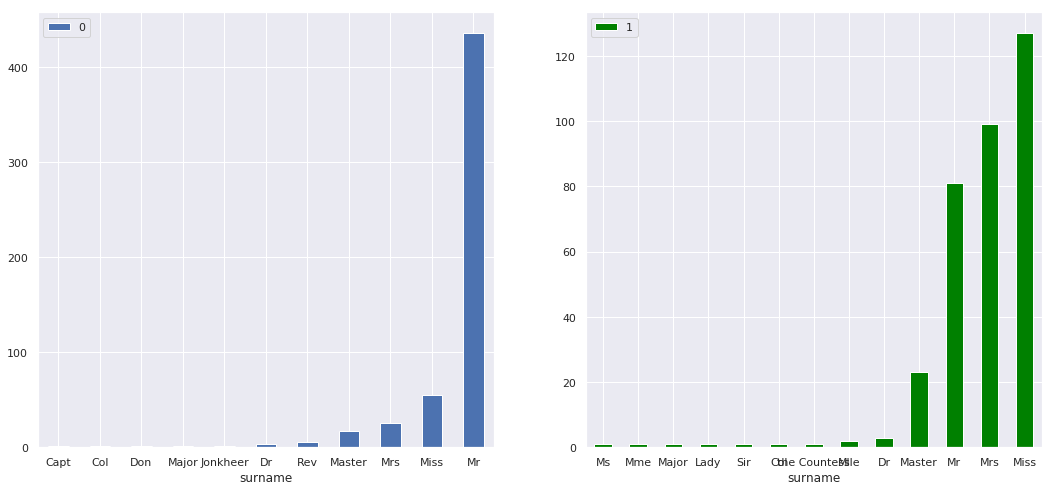

In [0]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
surname_survive.loc[0].plot('bar', label = '0')
plt.legend()
plt.xticks(rotation=0)
plt.subplot(1,2,2)
surname_survive.loc[1].plot('bar', label = '1', color='green')
plt.legend()
plt.xticks(rotation=0)

Text(0.5, 1.0, 'Survived by Surname')

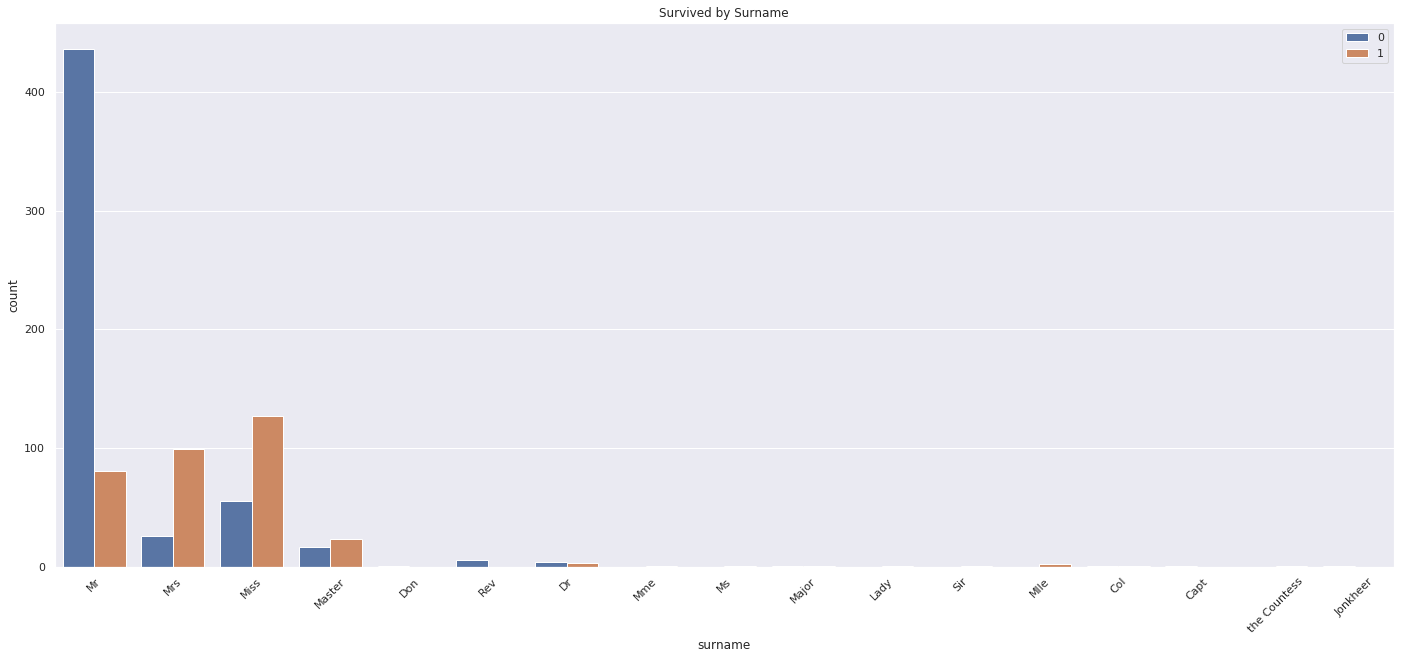

In [0]:
plt.figure(figsize=(24,10))
sns.countplot(x = 'surname', hue = 'Survived', data = train)
plt.xticks(rotation=45)
plt.legend()
plt.title('Survived by Surname')

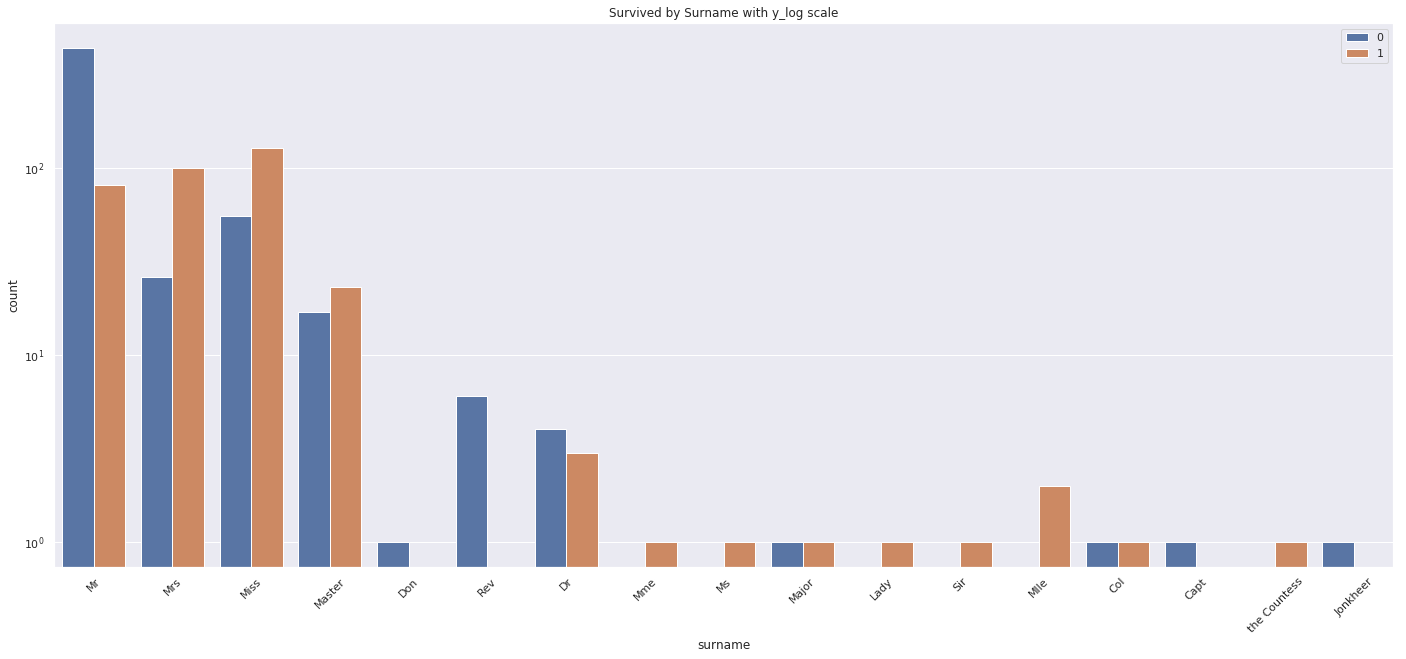

In [0]:
plt.figure(figsize=(24,10))
sns.countplot(x = 'surname', hue = 'Survived', data = train)
plt.xticks(rotation=45)
plt.legend()
plt.title('Survived by Surname with y_log scale')
plt.yscale('log')

Data Frame for references

In [0]:
surname_survive_pivot = surname_survive.unstack()
surname_survive_pivot

surname,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0



## required preprocessing 
###1 ) binning age
###2) binning fare most of data contains $10 less, so will just scale it
###3) Name 
###4) Ticket
#+ 5)  binning  Surname

In [0]:
def surname_classifier(x):
  if x in ['Capt', 'Col', 'Major', 'Dr', 'Rev']:
    return "Officer"
  elif x in ['Don', 'Sir', 'the Countess', 'Dona', 'Lady']:
    return "Royalty"
  elif x in ['Mme', 'Ms', 'Mrs']:
    return "Mrs"
  elif x == 'Mr':
    return 'Mr'
  elif x in ['Master', 'Jonkheer']:
    return 'Master'
  elif x in ['Miss', 'Mlle']:
    return 'Miss'
  else:
    return x

In [0]:
train['surname_clf'] = train.surname.apply(surname_classifier)
test['surname_clf'] = test.surname.apply(surname_classifier)

In [0]:
train.surname_clf.value_counts()

Mr         517
Miss       184
Mrs        127
Master      41
Officer     18
Royalty      4
Name: surname_clf, dtype: int64

In [0]:
test.surname_clf.value_counts()

Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Royalty      1
Name: surname_clf, dtype: int64

In [0]:
train.drop('surname', axis=1, inplace=True)
test.drop('surname', axis=1, inplace=True)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,age_bin,lastname,surname_clf
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,customer,S,3,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,4,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,customer,S,3,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,4,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,customer,S,4,Allen,Mr


Text(0.5, 1.0, 'Survived by Surname')

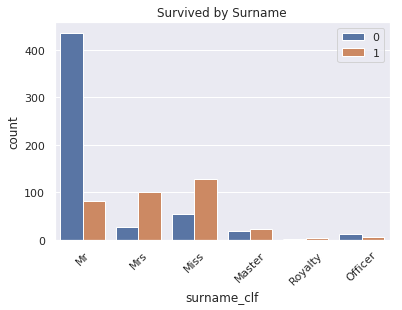

In [0]:
plt.figure()
sns.countplot(x = 'surname_clf', hue = 'Survived', data = train)
plt.xticks(rotation=45)
plt.legend()
plt.title('Survived by Surname')

In [0]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,age_bin,lastname,surname_clf
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,customer,Q,4,Kelly,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,customer,S,5,Wilkes,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,customer,Q,5,Myles,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,customer,S,3,Wirz,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,customer,S,3,Hirvonen,Mrs


In [0]:
train.to_csv('/content/drive/input/Titanic/working_dir/titanic_train_preprocess_done.csv', index=False)
test.to_csv('/content/drive/input/Titanic/working_dir/titanic_test_preprocess_done.csv', index=False)